<a href="https://colab.research.google.com/github/lgsilva-dev/credito/blob/features/CreditoEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Caderno de Limpeza e Exploração dos Dados

## Limpeza dos Dados

### Imports

In [1]:
!pip install phik

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import phik
from phik import resources, report

In [3]:
pd.set_option("display.max_columns", None)

In [4]:
df = pd.read_csv('/content/drive/MyDrive/gocn/df_oficial.csv')
df

,Empresa,EBITDA,Divida,Multiplicador do Setor,Margem EBITDA,Peso_margem_ebitda,nota_i1,nota_pi1,Divida liquida/EBTIDA,peso_Divida liquida/EBTIDA,nota_i2,nota_pi2,Indice de liquidez,peso_Indice de liquidez,nota_i3,nota_pi3,Ciclo Financeiro,peso_ciclo_financeiro,nota_i4,nota_pi4,Conversão de Ebitda em FCO,peso_conversao_ebitda_em_fco,nota_i5,nota_pi5,Tempo de atuação em anos,peso_tempo_atuacao,nota_i6,nota_pi6,Auditoria em Demonstrações Financeiras,peso_auditoria,nota_i7,nota_pi7,Pendencias Financeiras,peso_pendencias,nota_i8,nota_pi8,Possui Garantia,peso_garantia,nota_i9,nota_pi9,Possui Seguros,peso_seguros,nota_i10,nota_pi10,Serasa Score,peso_serasa_score,nota_i11,nota_pi11,SCORE GO ON,RATING GO ON,Crédito Concedido?,Valor Limite de Crédito
0,1,32405225,63411286,7.4,8.44,0.2,3,0.6,-0.94,0.1,5,0.5,1.94,0.1,4,0.4,101,0.1,5,0.5,31.81,0.1,2,0.2,4,0.05,2,0.10,Grant Thornton,0.1,4,0.4,Sem pendências,0.05,5,0.25,veículos,0.05,5,0.25,seguro patrimonial,0.05,5,0.25,900,0.1,4,0.4,3.85,4,Sim,176387376
1,2,3527758,9936724,7.4,3.70,0.2,2,0.4,2.23,0.1,2,0.2,0.62,0.1,2,0.2,99,0.1,5,0.5,-10.16,0.1,1,0.1,3,0.05,1,0.05,Não,0.1,1,0.1,Protesto e divida vencidas,0.05,2,0.10,não,0.05,1,0.05,não,0.05,1,0.05,50,0.1,1,0.1,1.85,2,Não,0
2,3,204665,455241,7.4,8.00,0.2,3,0.6,1.72,0.1,2,0.2,0.59,0.1,2,0.2,118,0.1,5,0.5,73.67,0.1,4,0.4,6,0.05,2,0.10,PwC,0.1,5,0.5,Pefin,0.05,3,0.15,veículos,0.05,5,0.25,não,0.05,1,0.05,200,0.1,1,0.1,3.05,3,Sim,1059279
3,4,4080707,12332276,7.4,3.35,0.2,2,0.4,2.19,0.1,2,0.2,0.51,0.1,2,0.2,51,0.1,5,0.5,81.34,0.1,5,0.5,2,0.05,1,0.05,KPMG,0.1,5,0.5,Protesto e ações judiciais,0.05,2,0.10,aval dos sócios,0.05,5,0.25,não,0.05,1,0.05,400,0.1,2,0.2,2.95,3,Sim,17864956
4,5,686668,791410,7.4,8.61,0.2,3,0.6,-0.17,0.1,5,0.5,2.40,0.1,5,0.5,21,0.1,5,0.5,69.11,0.1,4,0.4,4,0.05,2,0.10,PwC,0.1,5,0.5,Sem pendências,0.05,5,0.25,aval dos sócios,0.05,5,0.25,seguro empresarial completo,0.05,5,0.25,550,0.1,3,0.3,4.15,4,Sim,4289930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49996,41302,125417,7.4,4.85,0.2,2,0.4,2.82,0.1,1,0.1,0.56,0.1,2,0.2,95,0.1,5,0.5,49.27,0.1,3,0.3,3,0.05,1,0.05,Não,0.1,1,0.1,Pefin,0.05,3,0.15,não,0.05,1,0.05,seguro de estoque,0.05,3,0.15,600,0.1,3,0.3,2.30,2,Não,0
49996,49997,2878842,1647390,7.4,11.85,0.2,4,0.8,0.02,0.1,5,0.5,1.31,0.1,3,0.3,-31,0.1,2,0.2,126.84,0.1,5,0.5,11,0.05,3,0.15,Ernst & Young,0.1,5,0.5,Sem pendências,0.05,5,0.25,aval dos sócios,0.05,5,0.25,não,0.05,1,0.05,700,0.1,3,0.3,3.80,4,Sim,19656040
49997,49998,3120037,2382130,7.4,13.15,0.2,5,1.0,0.34,0.1,5,0.5,1.20,0.1,3,0.3,-17,0.1,4,0.4,124.71,0.1,5,0.5,15,0.05,4,0.20,BDO,0.1,4,0.4,Sem pendências,0.05,5,0.25,imóvel,0.05,5,0.25,seguro patrimonial,0.05,5,0.25,850,0.1,4,0.4,4.45,5,Sim,20706143
49998,49999,53237,188491,7.4,5.77,0.2,2,0.4,2.72,0.1,1,0.1,0.87,0.1,2,0.2,148,0.1,5,0.5,-9.64,0.1,1,0.1,14,0.05,4,0.20,Não,0.1,1,0.1,Pefin e dívida vencida,0.05,3,0.15,veículos,0.05,5,0.25,não,0.05,1,0.05,150,0.1,1,0.1,2.15,2,Não,0


* Troca de Nomes em Colunas e Drop de colunas desnecessarias!

In [5]:
df = df.drop(columns=['Multiplicador do Setor','nota_pi1','nota_pi2','nota_pi3','nota_pi4','nota_pi5','nota_pi6','nota_pi7','nota_pi8','nota_pi9','nota_pi10' ,'nota_pi11', 'Peso_margem_ebitda','peso_Divida liquida/EBTIDA', 'peso_Indice de liquidez', 'peso_ciclo_financeiro', 'peso_conversao_ebitda_em_fco', 'peso_tempo_atuacao', 'peso_auditoria', 'peso_pendencias','peso_garantia','peso_seguros','peso_serasa_score' ])

In [6]:
df = df.rename(columns={"Crédito Concedido?": "Target", "Valor Limite de Crédito": "Limite de Credito", "Possui Seguros":"Seguros", "Possui Garantia":"Garantia", "Conversão de Ebitda em FCO":"Conversao Ebitda em FCO", 'Pendencias Financeiras':'PEFIN', 'Auditoria em Demonstrações Financeiras': 'Auditorias'})

In [7]:
df['Target'].unique()

array(['Sim', 'Não'], dtype=object)

In [8]:
df['Target'] = df['Target'].replace({'Sim': 1, 'Não': 0})


<ipython-input-8-813b6108fabc>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Target'] = df['Target'].replace({'Sim': 1, 'Não': 0})


In [9]:
df['Target'] = df['Target'].astype(int)

* Quantidade de Concessões de Crédito e Porcentagem.

In [10]:
counts = df['Target'].value_counts()
percentages = df['Target'].value_counts(normalize=True) * 100
print(f"Total Aprovado: {counts.get(1, 0)} ocorrências ({percentages.get(1, 0):.2f}%)")
print(f"Total Reprovado: {counts.get(0, 0)} ocorrências ({percentages.get(0, 0):.2f}%)")

Total Aprovado: 34415 ocorrências (68.83%)
Total Reprovado: 15585 ocorrências (31.17%)


* Categorização das colunas String

In [11]:
df['PEFIN'].unique()

array(['Sem pendências', 'Protesto e divida vencidas', 'Pefin',
       'Protesto e ações judiciais', 'Protesto', 'Dívida vencida',
       'Ações judiciais', 'Pefin e dívida vencida'], dtype=object)

In [12]:
df['Auditorias'].unique()

array(['Grant Thornton', 'Não', 'PwC', 'KPMG', 'Ernst & Young',
       'Deloitte', 'BDO'], dtype=object)

In [13]:
df['Garantia'].unique()

array(['veículos', 'não', 'aval dos sócios', 'recebíveis',
       'máquinas e equipamentos', 'imóvel'], dtype=object)

In [14]:
df['Seguros'].unique()

array(['seguro patrimonial', 'não', 'seguro empresarial completo',
       'seguro de responsabilidade civil', 'seguro de estoque'],
      dtype=object)

In [15]:
df['PEFIN'] = df['PEFIN'].replace({'Sem pendências': 0, 'Protesto e divida vencidas': 1,'Pefin': 2,'Protesto e ações judiciais': 3, 'Protesto': 4, 'Dívida vencida': 5, 'Ações judiciais': 6, 'Pefin e dívida vencida': 7})
df['PEFIN'] = df['PEFIN'].astype(int)
df['Auditorias'] = df['Auditorias'].replace({'Não': 0, 'Grant Thornton': 1, 'PwC': 2,'KPMG': 3, 'Ernst & Young': 4, 'Deloitte': 5, 'BDO': 6})
df['Auditorias'] = df['Auditorias'].astype(int)
df['Garantia'] = df['Garantia'].replace({'não': 0, 'veículos': 1, 'aval dos sócios': 2,'recebíveis': 3, 'máquinas e equipamentos': 4, 'imóvel': 5})
df['Garantia'] = df['Garantia'].astype(int)
df['Seguros'] = df['Seguros'].replace({'não': 0, 'veículos': 1, 'seguro patrimonial': 2, 'seguro empresarial completo': 3, 'seguro de responsabilidade civil': 4, 'seguro de estoque': 5})
df['Seguros'] = df['Seguros'].astype(int)
df['Divida'] = df['Divida'].astype(float)
df['EBITDA'] = df['EBITDA'].astype(float)

<ipython-input-15-07399ff6010e>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['PEFIN'] = df['PEFIN'].replace({'Sem pendências': 0, 'Protesto e divida vencidas': 1,'Pefin': 2,'Protesto e ações judiciais': 3, 'Protesto': 4, 'Dívida vencida': 5, 'Ações judiciais': 6, 'Pefin e dívida vencida': 7})
<ipython-input-15-07399ff6010e>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Auditorias'] = df['Auditorias'].replace({'Não': 0, 'Grant Thornton': 1, 'PwC': 2,'KPMG': 3, 'Ernst & Young': 4, 'Deloitte': 5, 'BDO': 6})
<ipython-inp

In [16]:
df.head()

,Empresa,EBITDA,Divida,Margem EBITDA,nota_i1,Divida liquida/EBTIDA,nota_i2,Indice de liquidez,nota_i3,Ciclo Financeiro,nota_i4,Conversao Ebitda em FCO,nota_i5,Tempo de atuação em anos,nota_i6,Auditorias,nota_i7,PEFIN,nota_i8,Garantia,nota_i9,Seguros,nota_i10,Serasa Score,nota_i11,SCORE GO ON,RATING GO ON,Target,Limite de Credito
0,1,32405225.0,63411286.0,8.44,3,-0.94,5,1.94,4,101,5,31.81,2,4,2,1,4,0,5,1,5,2,5,900,4,3.85,4,1,176387376
1,2,3527758.0,9936724.0,3.70,2,2.23,2,0.62,2,99,5,-10.16,1,3,1,0,1,1,2,0,1,0,1,50,1,1.85,2,0,0
2,3,204665.0,455241.0,8.00,3,1.72,2,0.59,2,118,5,73.67,4,6,2,2,5,2,3,1,5,0,1,200,1,3.05,3,1,1059279
3,4,4080707.0,12332276.0,3.35,2,2.19,2,0.51,2,51,5,81.34,5,2,1,3,5,3,2,2,5,0,1,400,2,2.95,3,1,17864956
4,5,686668.0,791410.0,8.61,3,-0.17,5,2.40,5,21,5,69.11,4,4,2,2,5,0,5,2,5,3,5,550,3,4.15,4,1,4289930


In [17]:
#df_clean = df.copy()

In [18]:
#df_clean.to_csv('/content/drive/MyDrive/gocn/df_clean.csv', index=False)

## Exploração dos Dados

### Correlações

#### Pearson

* Correlação de Pearson

In [19]:
correlations = df.corr()
correlations

,Empresa,EBITDA,Divida,Margem EBITDA,nota_i1,Divida liquida/EBTIDA,nota_i2,Indice de liquidez,nota_i3,Ciclo Financeiro,nota_i4,Conversao Ebitda em FCO,nota_i5,Tempo de atuação em anos,nota_i6,Auditorias,nota_i7,PEFIN,nota_i8,Garantia,nota_i9,Seguros,nota_i10,Serasa Score,nota_i11,SCORE GO ON,RATING GO ON,Target,Limite de Credito
Empresa,1.000000,-0.001757,-0.004840,-0.005092,-0.001809,-0.001418,0.002038,-0.001203,0.000388,-0.002607,-0.000971,0.006445,0.005794,0.004381,0.000518,0.000643,0.003379,0.001474,-0.001404,0.000376,0.005513,-0.005997,-0.001531,0.000174,-0.000585,0.001429,0.000276,0.003178,-0.000574
EBITDA,-0.001757,1.000000,0.932766,0.082435,0.094212,-0.097767,0.102255,0.084312,0.087778,-0.072930,-0.035042,0.067328,0.069246,0.040168,0.051221,0.060125,0.076042,-0.055266,0.062206,0.042091,0.041581,0.053607,0.056649,0.087170,0.085742,0.100686,0.098698,0.087527,0.988796
Divida,-0.004840,0.932766,1.000000,0.059426,0.068216,-0.067384,0.068216,0.061878,0.065057,-0.053112,-0.026579,0.048668,0.050365,0.032322,0.037541,0.042730,0.054997,-0.038269,0.045505,0.027966,0.027344,0.037574,0.040651,0.063466,0.062350,0.071802,0.069985,0.062460,0.878289
Margem EBITDA,-0.005092,0.082435,0.059426,1.000000,0.879938,-0.750614,0.782466,0.661084,0.681775,-0.525230,-0.225633,0.524766,0.540596,0.305533,0.415185,0.418301,0.574924,-0.407753,0.465148,0.333011,0.331575,0.373643,0.436434,0.647409,0.632190,0.821394,0.806442,0.694889,0.094098
nota_i1,-0.001809,0.094212,0.068216,0.879938,1.000000,-0.837644,0.874045,0.738838,0.762049,-0.590032,-0.253270,0.585083,0.603955,0.339406,0.460976,0.467271,0.640832,-0.458863,0.522056,0.370471,0.371418,0.418823,0.486736,0.722359,0.706069,0.922195,0.903502,0.806418,0.107440
Divida liquida/EBTIDA,-0.001418,-0.097767,-0.067384,-0.750614,-0.837644,1.000000,-0.964970,-0.751262,-0.773717,0.599243,0.260518,-0.595513,-0.615409,-0.343211,-0.466779,-0.474844,-0.652468,0.463909,-0.528558,-0.378939,-0.378914,-0.425312,-0.495878,-0.733034,-0.716841,-0.898496,-0.880380,-0.772585,-0.111307
nota_i2,0.002038,0.102255,0.068216,0.782466,0.874045,-0.964970,1.000000,0.783175,0.807114,-0.623250,-0.270956,0.622668,0.643132,0.357860,0.487336,0.493984,0.680405,-0.484638,0.552184,0.393236,0.394256,0.442145,0.515137,0.764430,0.747032,0.936148,0.917314,0.803239,0.117111
Indice de liquidez,-0.001203,0.084312,0.061878,0.661084,0.738838,-0.751262,0.783175,1.000000,0.970469,-0.528011,-0.228787,0.529070,0.546913,0.303644,0.411619,0.415570,0.573291,-0.407624,0.465946,0.331051,0.332645,0.371354,0.437887,0.648974,0.633313,0.813816,0.792651,0.670685,0.095663
nota_i3,0.000388,0.087778,0.065057,0.681775,0.762049,-0.773717,0.807114,0.970469,1.000000,-0.545285,-0.236173,0.545186,0.564217,0.314313,0.425535,0.429489,0.591985,-0.420001,0.480638,0.341553,0.343694,0.383493,0.452694,0.669244,0.653487,0.839522,0.817588,0.691873,0.099424
Ciclo Financeiro,-0.002607,-0.072930,-0.053112,-0.525230,-0.590032,0.599243,-0.623250,-0.528011,-0.545285,1.000000,0.599681,-0.420984,-0.433874,-0.243161,-0.331583,-0.331311,-0.457583,0.323840,-0.372282,-0.265956,-0.263589,-0.297705,-0.350545,-0.514836,-0.501834,-0.584174,-0.567493,-0.533496,-0.082444


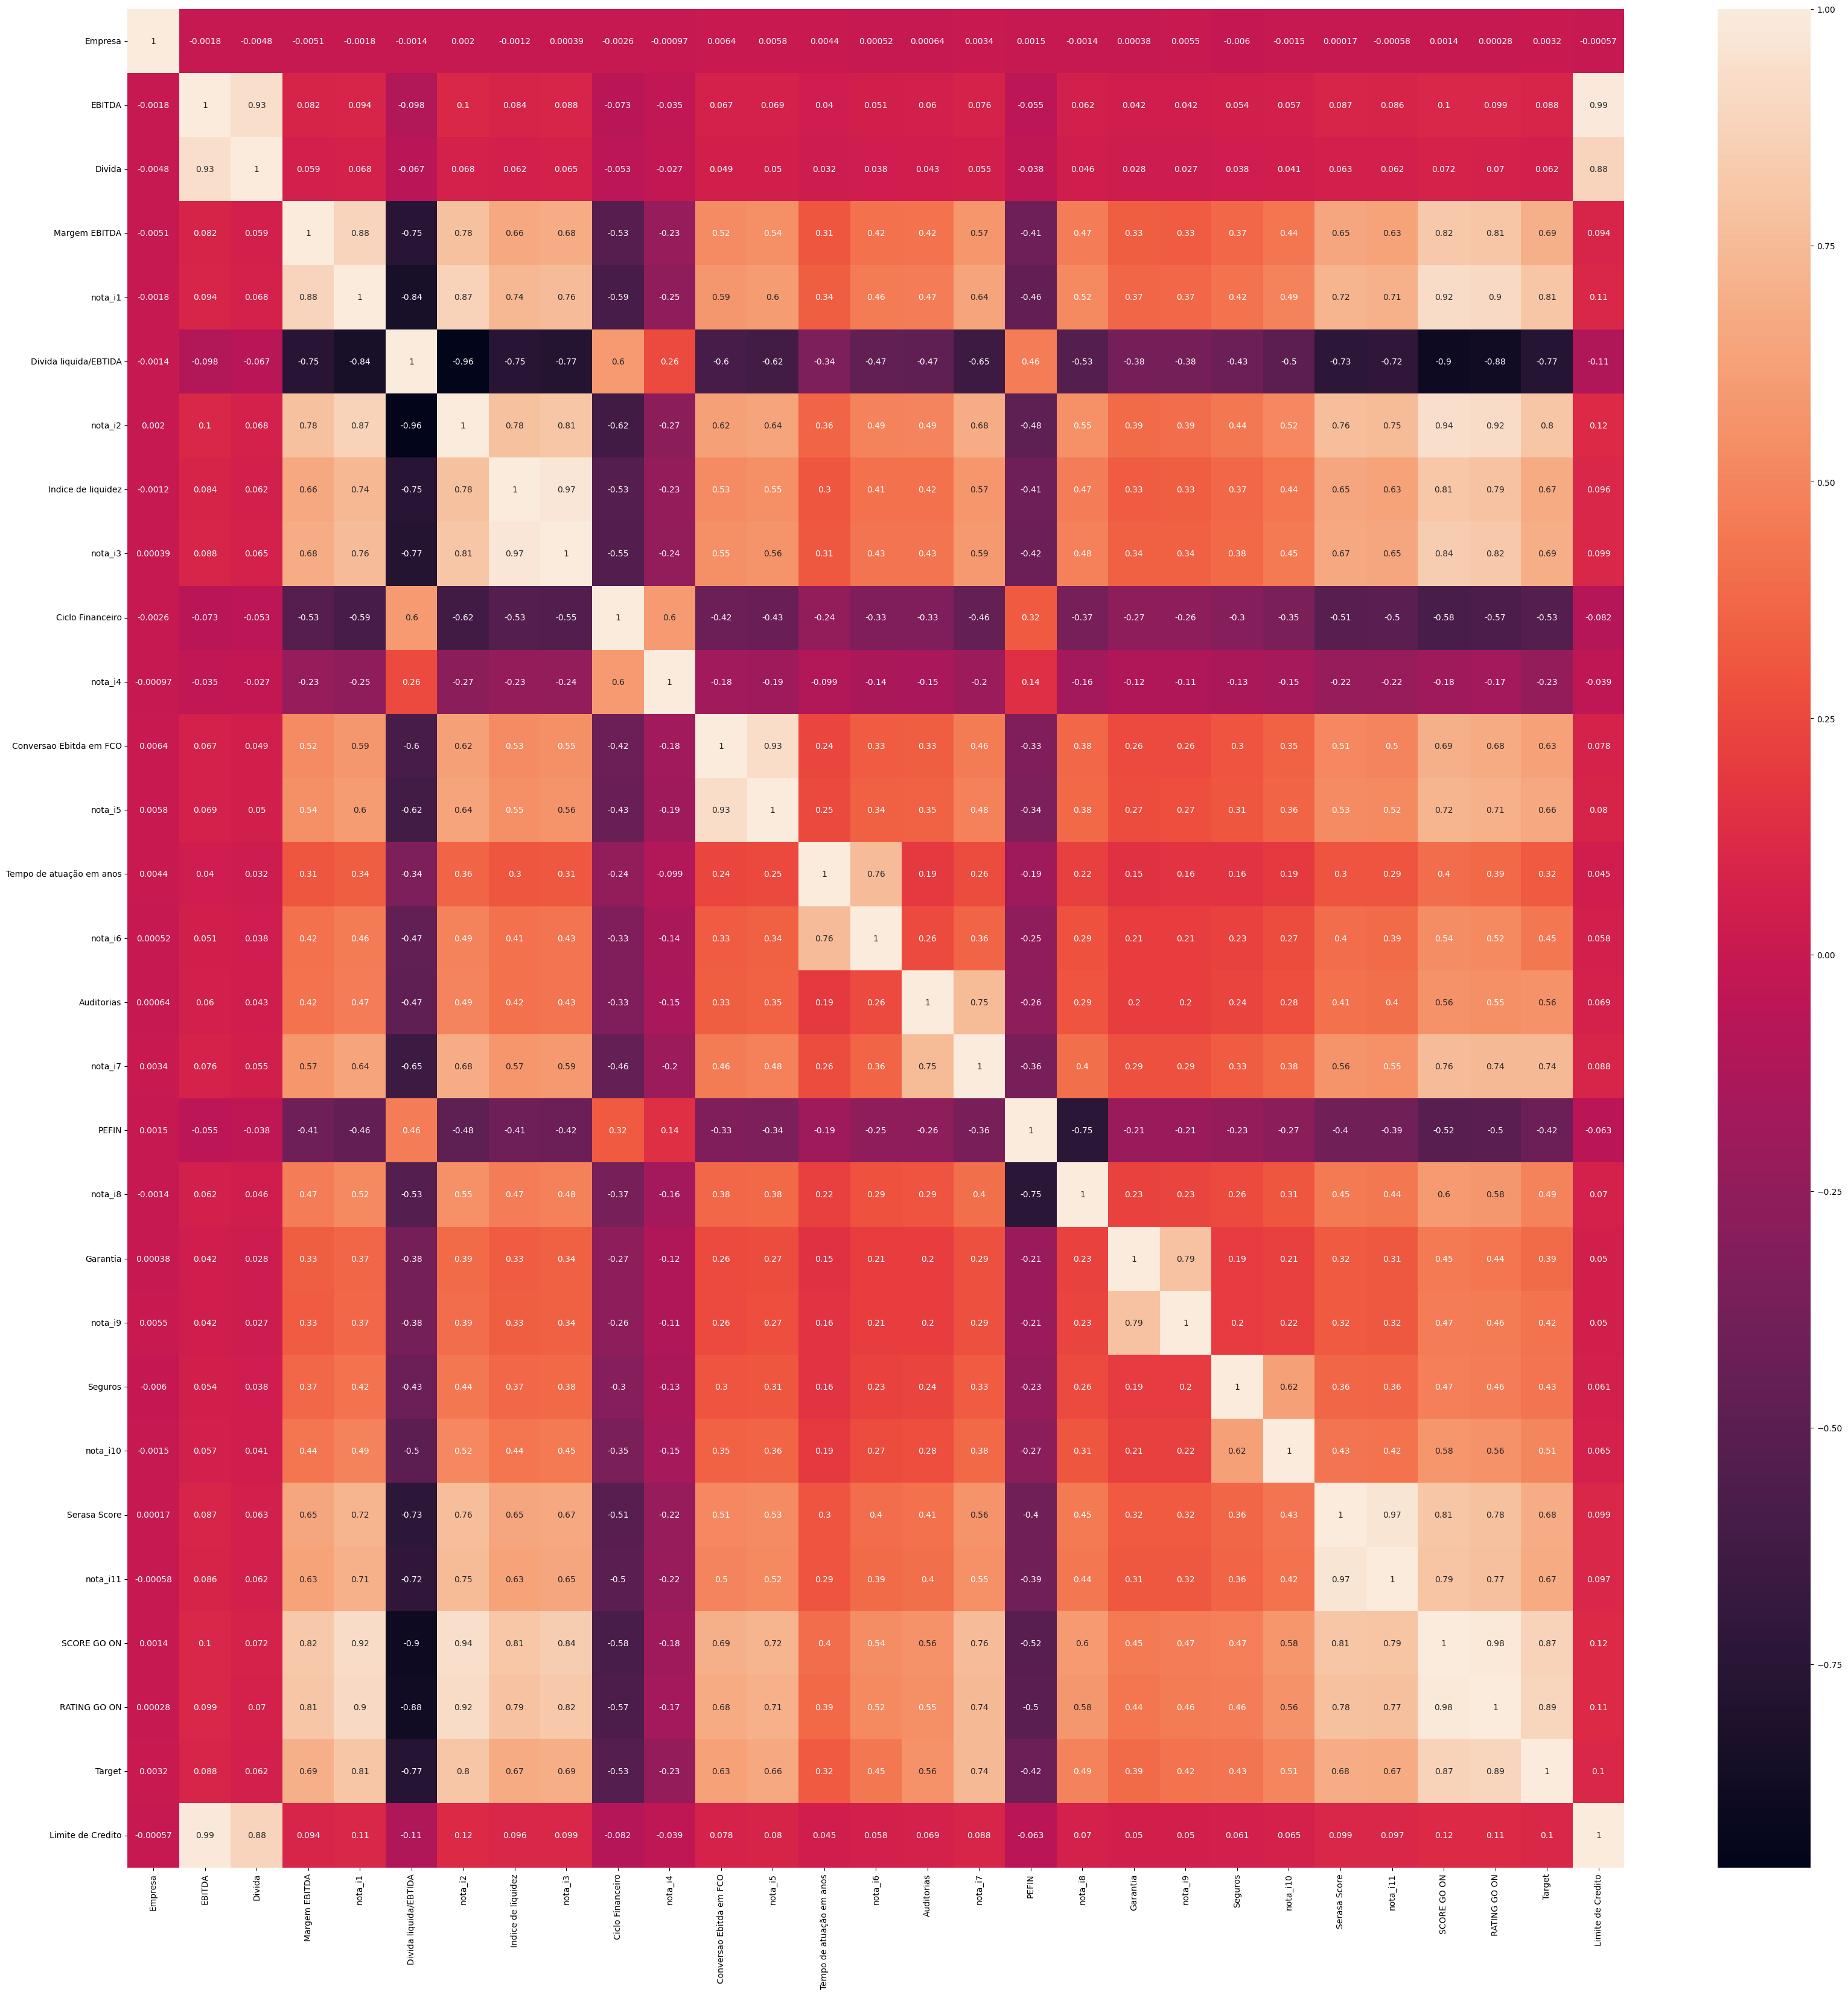

In [20]:
f, ax = plt.subplots(figsize=(40,40)), sns.heatmap(correlations, annot = True);

* Lista das maiores Corrrelações de Pearson

In [21]:
correlacoes = df.corr(numeric_only=True)['Target'].drop('Target').sort_values(ascending=False)
correlacoes

,Target
RATING GO ON,0.892216
SCORE GO ON,0.872151
nota_i1,0.806418
nota_i2,0.803239
nota_i7,0.743926
Margem EBITDA,0.694889
nota_i3,0.691873
Serasa Score,0.683172
Indice de liquidez,0.670685
nota_i11,0.669985


In [22]:
correlacoes = df.corr(numeric_only=True)['Target'].drop('Target').abs().sort_values(ascending=False)
top_features = correlacoes.head(5).index  # Pegando as 5 mais correlacionadas

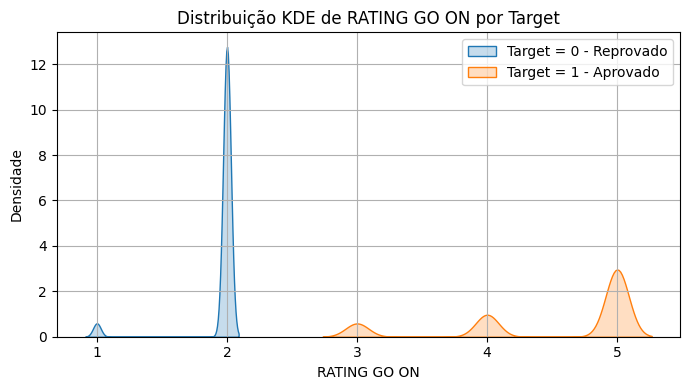

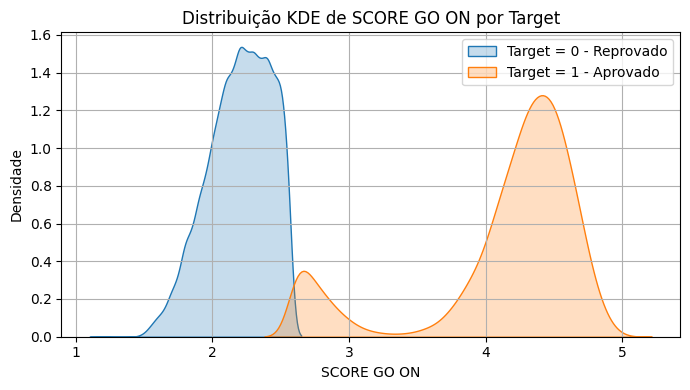

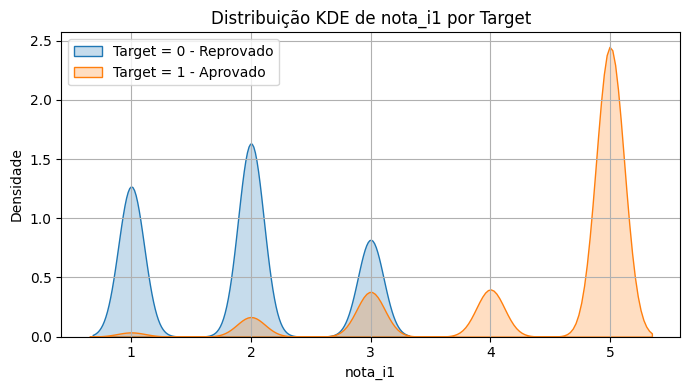

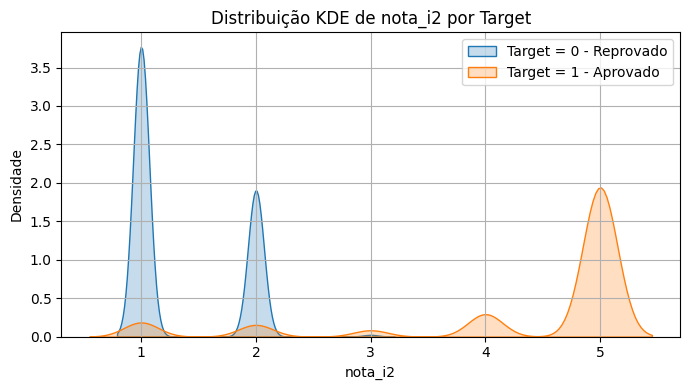

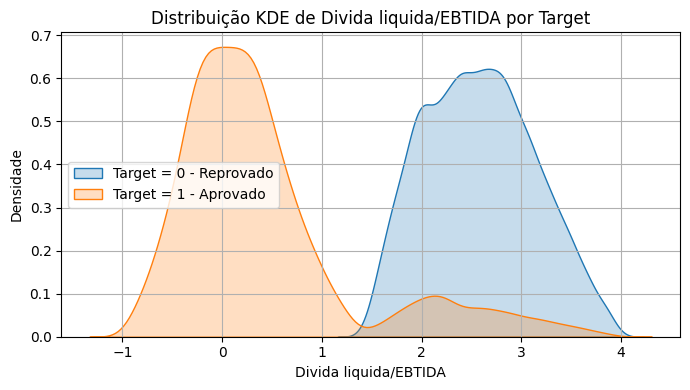

In [23]:
for feature in top_features:
    plt.figure(figsize=(7, 4))
    sns.kdeplot(data=df[df['Target'] == 0], x=feature, fill=True, label='Target = 0 - Reprovado', common_norm=False)
    sns.kdeplot(data=df[df['Target'] == 1], x=feature, fill=True, label='Target = 1 - Aprovado', common_norm=False)
    plt.title(f'Distribuição KDE de {feature} por Target')
    plt.xlabel(feature)
    plt.ylabel('Densidade')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#### Phi-K

* Correlação de Phi-K
(Muito boa para correlacionar numeros com categorias e medir a dependencia dos valores.)

In [24]:
# get the phi_k correlation matrix between all variables
phik = df.phik_matrix()
phik

interval columns not set, guessing: ['Empresa', 'EBITDA', 'Divida', 'Margem EBITDA', 'nota_i1', 'Divida liquida/EBTIDA', 'nota_i2', 'Indice de liquidez', 'nota_i3', 'Ciclo Financeiro', 'nota_i4', 'Conversao Ebitda em FCO', 'nota_i5', 'Tempo de atuação em anos', 'nota_i6', 'Auditorias', 'nota_i7', 'PEFIN', 'nota_i8', 'Garantia', 'nota_i9', 'Seguros', 'nota_i10', 'Serasa Score', 'nota_i11', 'SCORE GO ON', 'RATING GO ON', 'Target', 'Limite de Credito']


,Empresa,EBITDA,Divida,Margem EBITDA,nota_i1,Divida liquida/EBTIDA,nota_i2,Indice de liquidez,nota_i3,Ciclo Financeiro,nota_i4,Conversao Ebitda em FCO,nota_i5,Tempo de atuação em anos,nota_i6,Auditorias,nota_i7,PEFIN,nota_i8,Garantia,nota_i9,Seguros,nota_i10,Serasa Score,nota_i11,SCORE GO ON,RATING GO ON,Target,Limite de Credito
Empresa,1.000000,0.002447,0.001916,0.000000,0.000000,0.021540,0.000000,0.000000,0.000000,0.000000,0.014183,0.000000,0.013254,0.012333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001504,0.000000,0.011939,0.012560,0.006390,0.016377,0.012164,0.000000,0.000000
EBITDA,0.002447,1.000000,0.817515,0.031468,0.024374,0.027172,0.030075,0.029617,0.034395,0.023383,0.017070,0.007444,0.022496,0.057782,0.012291,0.033188,0.028391,0.000000,0.014348,0.011049,0.014505,0.017697,0.019460,0.023108,0.025060,0.026594,0.027443,0.028794,0.953862
Divida,0.001916,0.817515,1.000000,0.025226,0.022019,0.029003,0.035565,0.026464,0.033757,0.047062,0.029832,0.000000,0.016620,0.073127,0.012080,0.018222,0.028522,0.000000,0.000000,0.014497,0.015649,0.018056,0.029837,0.016223,0.021300,0.022559,0.023992,0.025083,0.917797
Margem EBITDA,0.000000,0.031468,0.025226,1.000000,0.980075,0.740285,0.810594,0.718018,0.736062,0.571779,0.338876,0.570426,0.633726,0.189547,0.523447,0.501835,0.640654,0.460234,0.541696,0.339388,0.499846,0.562297,0.519859,0.661720,0.718346,0.780076,0.841881,0.950536,0.030980
nota_i1,0.000000,0.024374,0.022019,0.980075,1.000000,0.815948,0.841103,0.792164,0.621141,0.636115,0.378735,0.634261,0.685188,0.209751,0.576727,0.500420,0.551165,0.482376,0.425335,0.302933,0.319449,0.615304,0.438650,0.732499,0.762343,0.870609,0.875891,0.689021,0.025741
Divida liquida/EBTIDA,0.021540,0.027172,0.029003,0.740285,0.815948,1.000000,0.996332,0.741504,0.762800,0.595200,0.356345,0.595276,0.660907,0.197741,0.549439,0.525445,0.666574,0.482326,0.566998,0.357049,0.528879,0.587326,0.542484,0.686625,0.744984,0.770682,0.840364,0.957801,0.024791
nota_i2,0.000000,0.030075,0.035565,0.810594,0.841103,0.996332,1.000000,0.811790,0.645008,0.654822,0.393405,0.654988,0.704735,0.220601,0.596395,0.519668,0.570825,0.500753,0.443408,0.315744,0.334162,0.634466,0.454833,0.753082,0.780619,0.844815,0.862574,0.691222,0.031224
Indice de liquidez,0.000000,0.029617,0.026464,0.718018,0.792164,0.741504,0.811790,1.000000,0.978855,0.573490,0.341113,0.572715,0.635821,0.184854,0.524123,0.502063,0.640770,0.461073,0.542467,0.338998,0.499814,0.563650,0.520653,0.663568,0.720214,0.759559,0.820873,0.929377,0.030825
nota_i3,0.000000,0.034395,0.033757,0.736062,0.621141,0.762800,0.645008,0.978855,1.000000,0.574050,0.219422,0.573830,0.455301,0.179499,0.358946,0.564343,0.517551,0.718419,0.739288,0.382466,0.593808,0.390435,0.396969,0.674549,0.539346,0.783574,0.656353,0.962001,0.037776
Ciclo Financeiro,0.000000,0.023383,0.047062,0.571779,0.636115,0.595200,0.654822,0.573490,0.574050,1.000000,0.888273,0.433610,0.484262,0.130731,0.392104,0.371910,0.495354,0.339463,0.399744,0.243075,0.349284,0.421542,0.392785,0.515580,0.560040,0.655064,0.711090,0.696629,0.018912


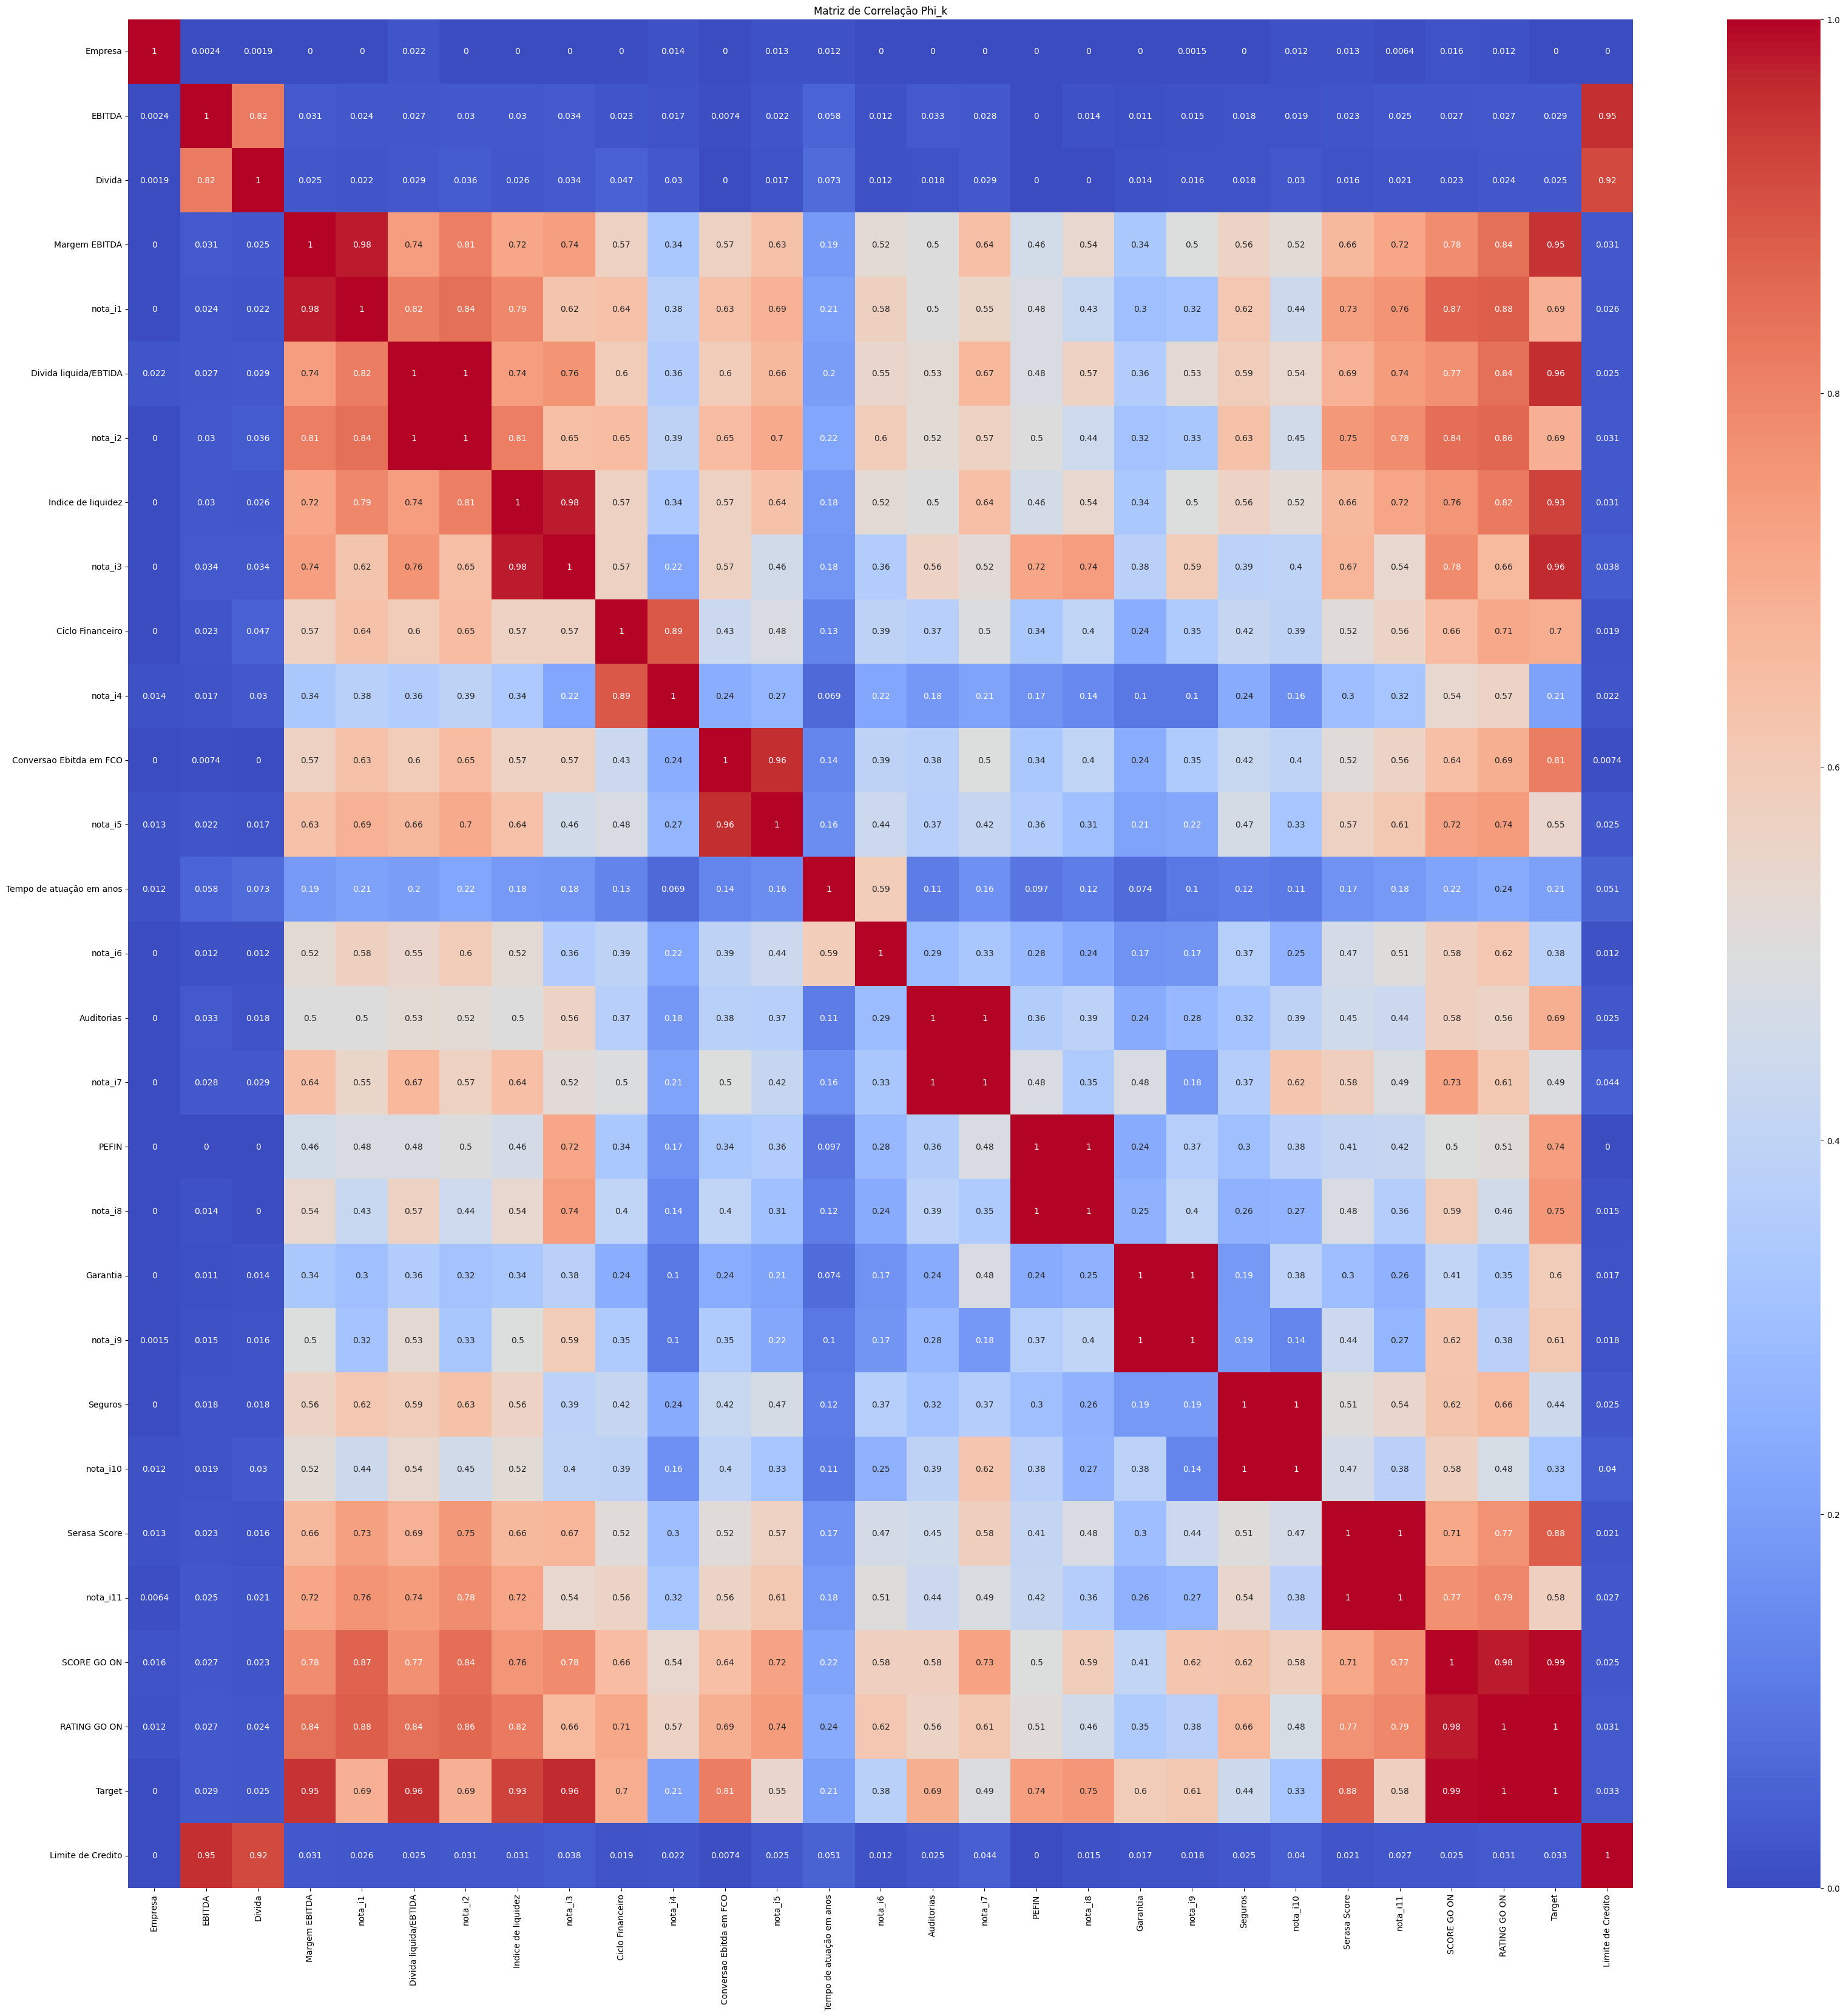

In [25]:
plt.figure(figsize=(40, 40))
sns.heatmap(phik, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title("Matriz de Correlação Phi_k")
plt.show()

* Matriz de Significancia

In [26]:
# get the significance matrix (expressed as one-sided Z)
# of the hypothesis test of each variable-pair dependency
df.significance_matrix()

interval columns not set, guessing: ['Empresa', 'EBITDA', 'Divida', 'Margem EBITDA', 'nota_i1', 'Divida liquida/EBTIDA', 'nota_i2', 'Indice de liquidez', 'nota_i3', 'Ciclo Financeiro', 'nota_i4', 'Conversao Ebitda em FCO', 'nota_i5', 'Tempo de atuação em anos', 'nota_i6', 'Auditorias', 'nota_i7', 'PEFIN', 'nota_i8', 'Garantia', 'nota_i9', 'Seguros', 'nota_i10', 'Serasa Score', 'nota_i11', 'SCORE GO ON', 'RATING GO ON', 'Target', 'Limite de Credito']


,Empresa,EBITDA,Divida,Margem EBITDA,nota_i1,Divida liquida/EBTIDA,nota_i2,Indice de liquidez,nota_i3,Ciclo Financeiro,nota_i4,Conversao Ebitda em FCO,nota_i5,Tempo de atuação em anos,nota_i6,Auditorias,nota_i7,PEFIN,nota_i8,Garantia,nota_i9,Seguros,nota_i10,Serasa Score,nota_i11,SCORE GO ON,RATING GO ON,Target,Limite de Credito
Empresa,479.089274,0.309187,0.293209,-0.417571,-0.695367,1.392285,-0.096295,-0.621687,-0.987336,-2.009527,0.917496,-0.774778,0.785302,0.913971,-0.719143,-1.328265,-1.536872,-1.345215,-0.251676,-0.926344,0.204793,-0.419091,0.872001,0.594367,0.204336,0.964877,0.643387,-1.194958,0.207609
EBITDA,0.309187,47.307041,37.474462,5.404191,6.332492,6.054913,8.021455,6.359185,8.615209,2.827262,1.390492,3.444980,5.381321,1.739489,2.171458,4.947776,5.846826,1.458597,2.796489,1.436539,2.787734,3.135489,3.155806,5.162546,5.962025,6.510706,7.756076,7.532925,42.867086
Divida,0.293209,37.474462,48.231840,4.395171,4.923890,4.942063,6.371154,4.382417,6.517143,2.061429,1.941815,1.701850,2.747689,1.707376,1.458752,3.039238,3.230794,-0.166376,1.072153,1.567977,2.617801,2.517245,2.797919,3.188708,4.010462,5.142322,5.181536,5.385129,34.393890
Margem EBITDA,-0.417571,5.404191,4.395171,473.542946,329.198548,241.396851,241.967106,227.974045,243.327611,148.100894,74.576039,147.032577,148.990784,42.130994,112.617833,163.684669,163.718146,150.986210,146.971114,93.955668,86.077615,122.490328,117.346117,190.922568,186.632748,255.270329,251.688913,198.627041,6.443933
nota_i1,-0.695367,6.332492,4.923890,329.198548,371.085109,243.610620,243.843997,229.806862,245.094238,150.676098,75.327298,149.762890,151.364320,43.120766,114.588826,166.160829,165.878989,152.746192,148.360131,95.669218,87.414092,124.555283,119.109125,193.168043,188.527267,261.543096,256.379933,202.326052,6.752939
Divida liquida/EBTIDA,1.392285,6.054913,4.942063,241.396851,243.610620,456.729820,332.035590,241.721249,257.621829,156.846319,80.024612,155.811692,157.721143,45.366945,119.942432,172.934488,172.917483,160.541296,156.289085,99.693463,91.059017,129.762764,123.908341,202.654938,198.100901,258.265791,257.671362,201.720782,6.899887
nota_i2,-0.096295,8.021455,6.371154,241.967106,243.843997,332.035590,353.761462,242.268427,257.783732,157.579328,80.530948,156.542451,158.062279,46.599802,120.337319,173.429446,173.079242,161.147779,156.600003,100.285008,91.237350,130.200433,124.149323,203.249455,198.399344,259.377025,258.218550,201.944825,8.634820
Indice de liquidez,-0.621687,6.359185,4.382417,227.974045,229.806862,241.721249,242.268427,474.289201,344.854586,148.613447,74.768434,147.852699,149.728614,40.993753,112.745678,163.941312,163.894021,151.180401,146.986521,93.883709,86.075978,122.931882,117.698270,191.617821,187.308518,247.850089,244.761805,191.657551,6.853190
nota_i3,-0.987336,8.615209,6.517143,243.327611,245.094238,257.621829,257.783732,344.854586,364.839697,158.574002,80.971148,157.463856,158.995534,46.972838,120.860466,174.282464,173.884533,161.956712,157.309243,100.949202,91.716642,130.869635,124.737401,204.443630,199.458569,263.668274,260.252120,202.207754,9.435565
Ciclo Financeiro,-2.009527,2.827262,2.061429,148.100894,150.676098,156.846319,157.579328,148.613447,158.574002,413.021864,192.556017,99.790324,101.601134,27.496259,78.514509,111.185554,111.703100,102.484885,100.054161,64.602373,59.526912,84.727063,81.563088,126.531662,124.559393,170.347398,168.060121,127.039583,2.885123


* Lista das maiores Corrrelações de Phi-K

In [27]:
phik_corrs = phik.loc['Target'].drop('Target').sort_values(ascending=False)
phik_corrs

,Target
RATING GO ON,1.000000
SCORE GO ON,0.992547
nota_i3,0.962001
Divida liquida/EBTIDA,0.957801
Margem EBITDA,0.950536
Indice de liquidez,0.929377
Serasa Score,0.876808
Conversao Ebitda em FCO,0.814689
nota_i8,0.753928
PEFIN,0.736514


In [28]:
#phik_corrs = phik.loc['Target'].drop('Target').sort_values(ascending=False)
top_featurespk = phik_corrs.head(5).index

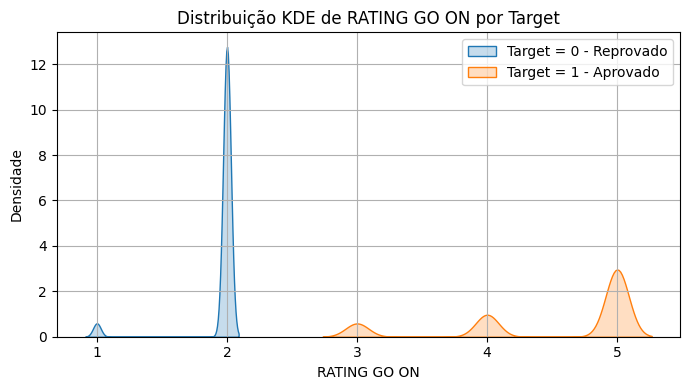

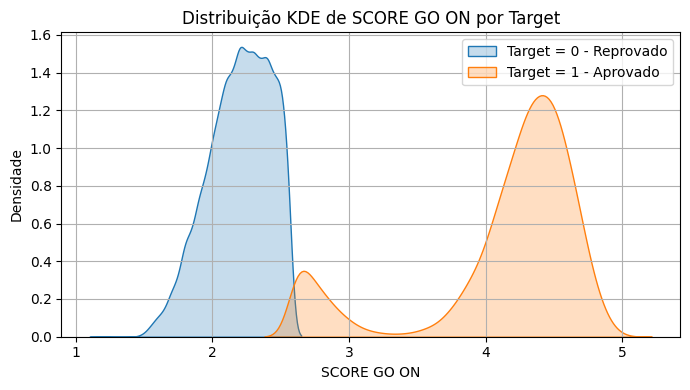

<ipython-input-29-5d77d89c6984>:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df[df['Target'] == 0], x=feature, fill=True, label='Target = 0 - Reprovado', common_norm=False)


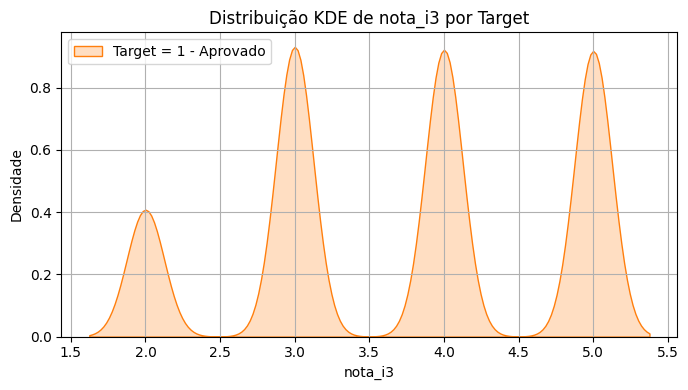

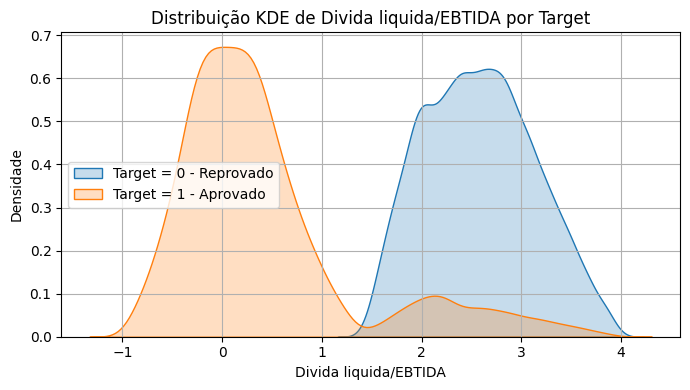

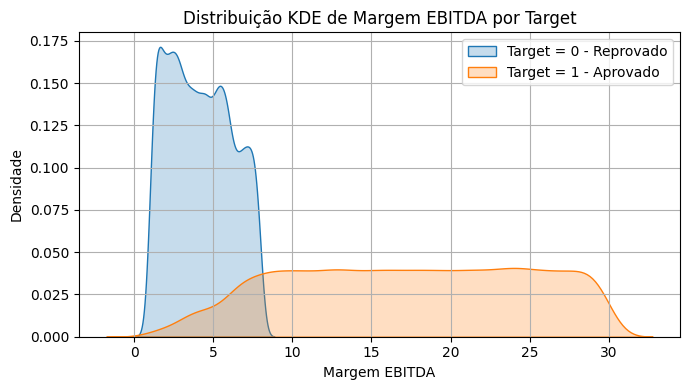

In [29]:
for feature in top_featurespk:
    plt.figure(figsize=(7, 4))
    sns.kdeplot(data=df[df['Target'] == 0], x=feature, fill=True, label='Target = 0 - Reprovado', common_norm=False)
    sns.kdeplot(data=df[df['Target'] == 1], x=feature, fill=True, label='Target = 1 - Aprovado', common_norm=False)
    plt.title(f'Distribuição KDE de {feature} por Target')
    plt.xlabel(feature)
    plt.ylabel('Densidade')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### Distribuições

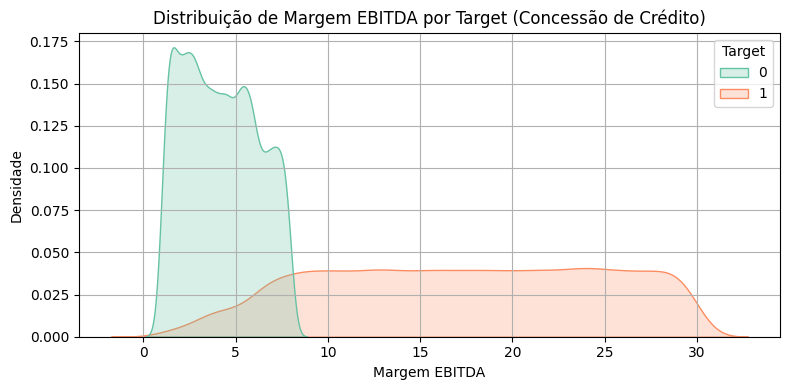

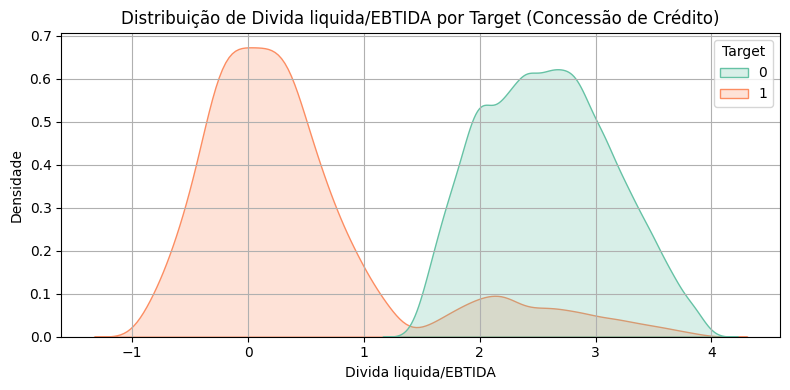

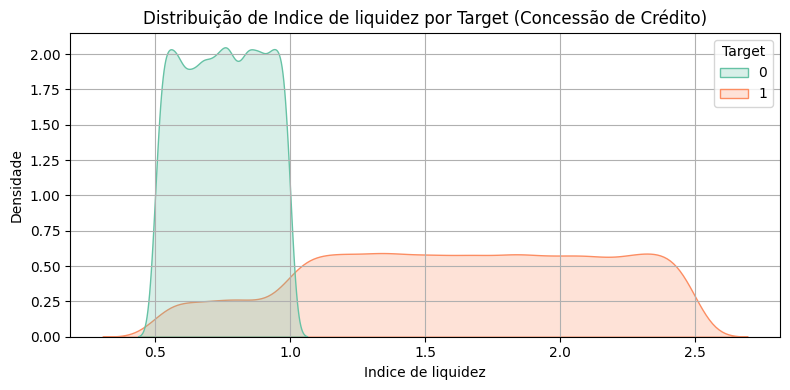

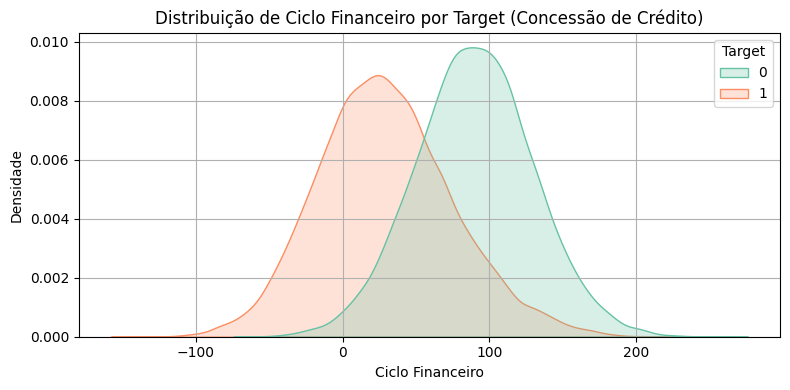

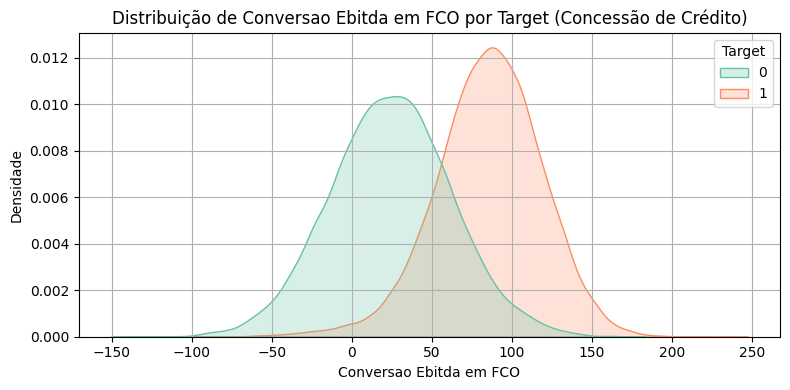

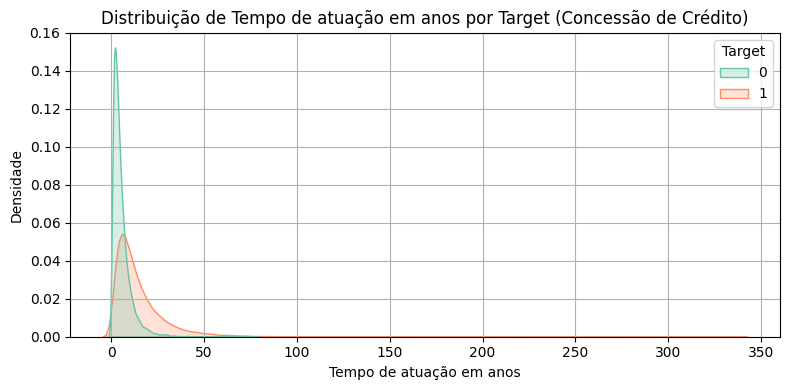

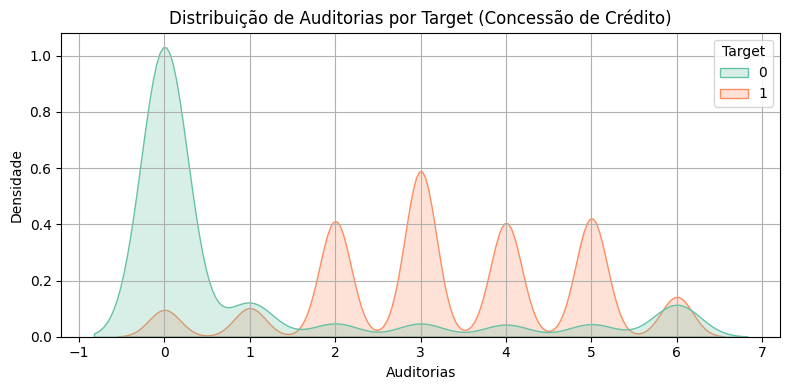

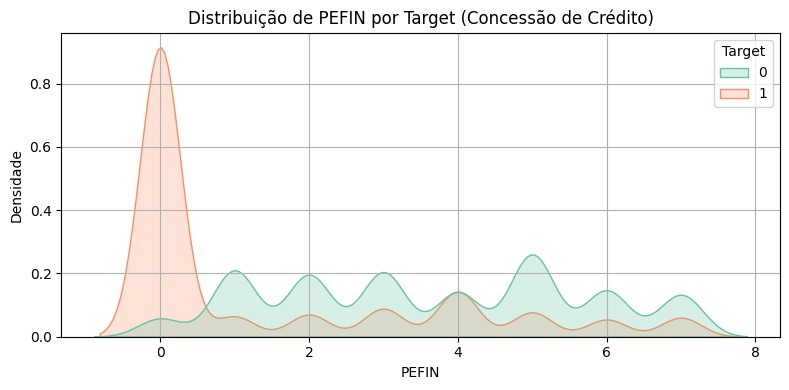

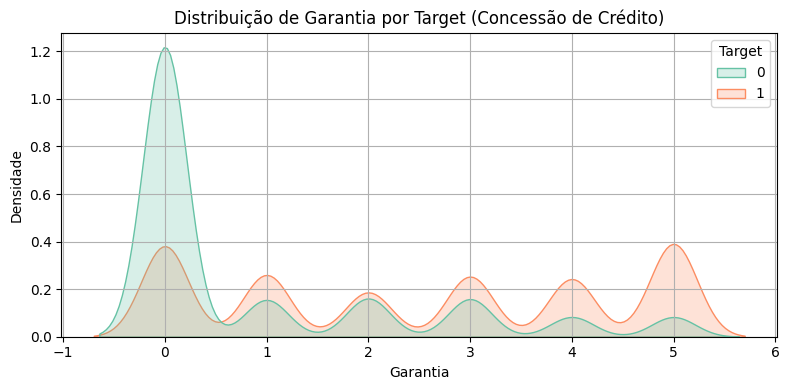

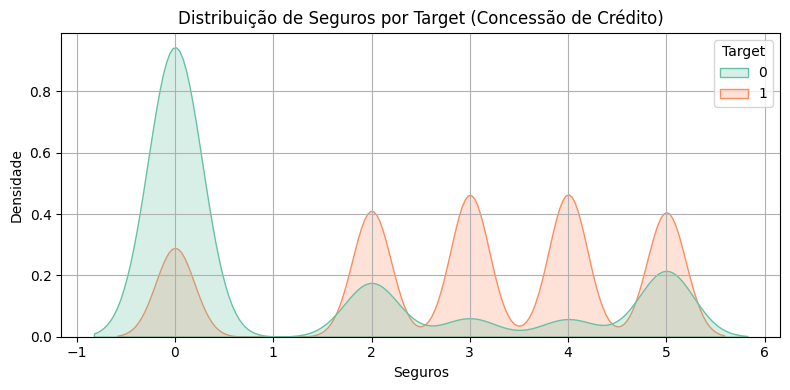

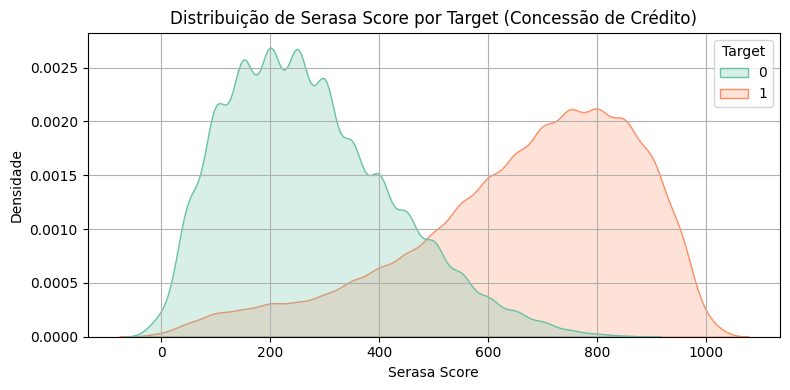

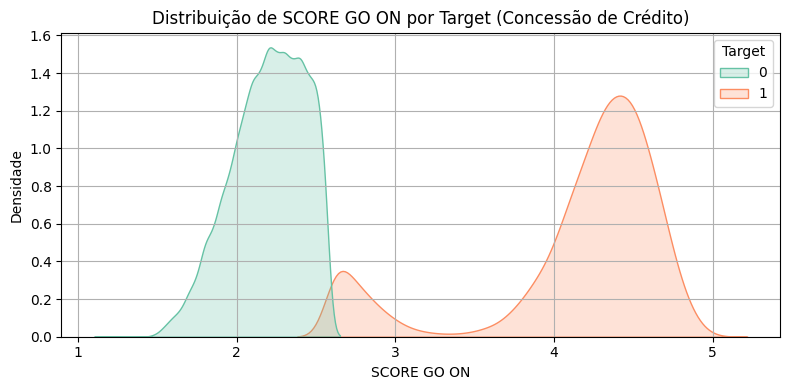

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

indicadores = [ 'Margem EBITDA', 'Divida liquida/EBTIDA', 'Indice de liquidez',
               'Ciclo Financeiro', 'Conversao Ebitda em FCO', 'Tempo de atuação em anos','Auditorias','PEFIN', 'Garantia', 'Seguros', 'Serasa Score',
               'SCORE GO ON']

for col in indicadores:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data=df, x=col, hue='Target', fill=True, common_norm=False, palette='Set2')
    plt.title(f'Distribuição de {col} por Target (Concessão de Crédito)')
    plt.xlabel(col)
    plt.ylabel('Densidade')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### Notas vs Indicadores

In [31]:
notas_vs_indicadores = {
    'nota_i1': 'Margem EBITDA',
    'nota_i2': 'Divida liquida/EBTIDA',
    'nota_i3': 'Indice de liquidez',
    'nota_i4': 'Ciclo Financeiro',
    'nota_i5': 'Conversao Ebitda em FCO',
    'nota_i6': 'Tempo de atuação em anos',
    'nota_i7': 'Auditorias',
    'nota_i8': 'PEFIN',
    'nota_i9': 'Garantia',
    'nota_i10': 'Seguros',
    'nota_i11': 'Serasa Score'
}

<ipython-input-32-50dc17ac4b24>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=nota, y=indicador, palette='Set3')


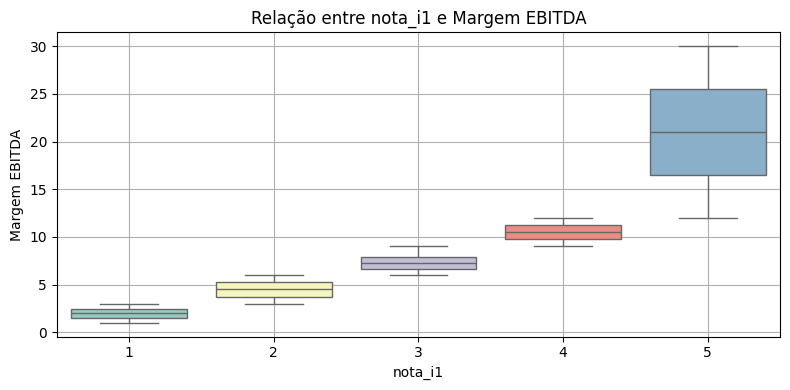

<ipython-input-32-50dc17ac4b24>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=nota, y=indicador, palette='Set3')


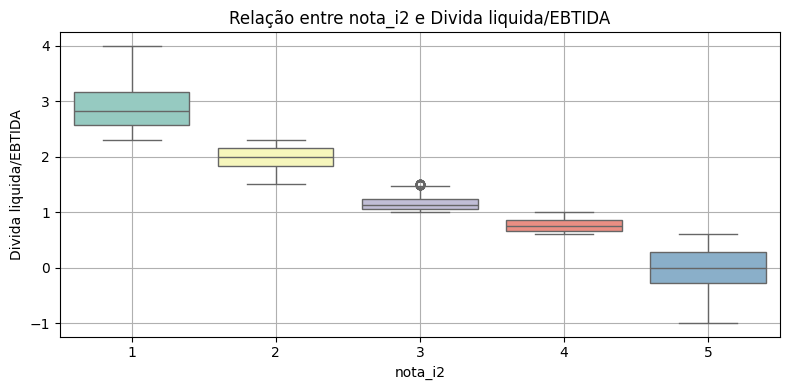

<ipython-input-32-50dc17ac4b24>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=nota, y=indicador, palette='Set3')


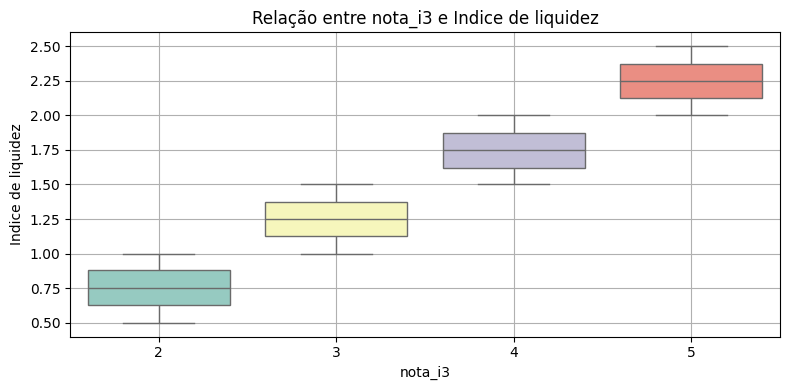

<ipython-input-32-50dc17ac4b24>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=nota, y=indicador, palette='Set3')


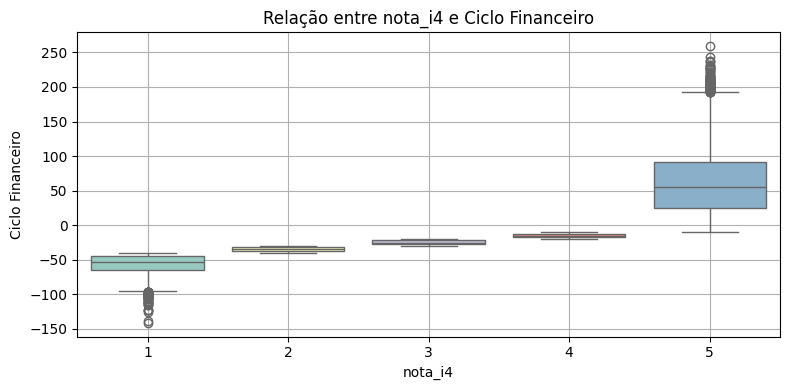

<ipython-input-32-50dc17ac4b24>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=nota, y=indicador, palette='Set3')


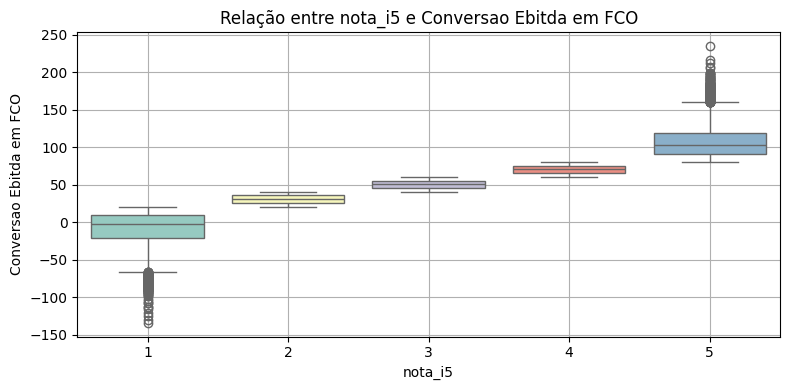

<ipython-input-32-50dc17ac4b24>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=nota, y=indicador, palette='Set3')


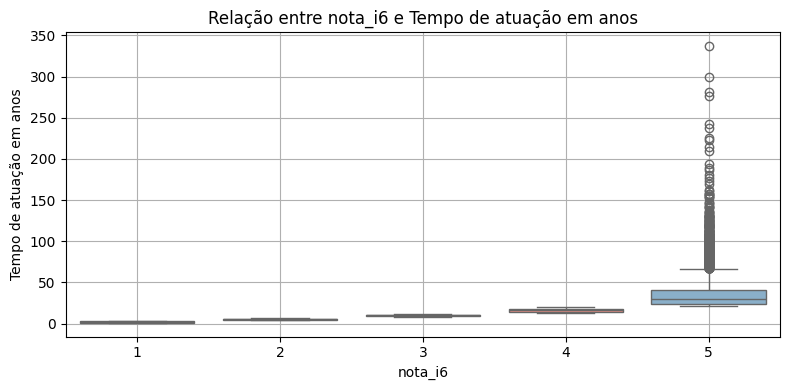

<ipython-input-32-50dc17ac4b24>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=nota, y=indicador, palette='Set3')


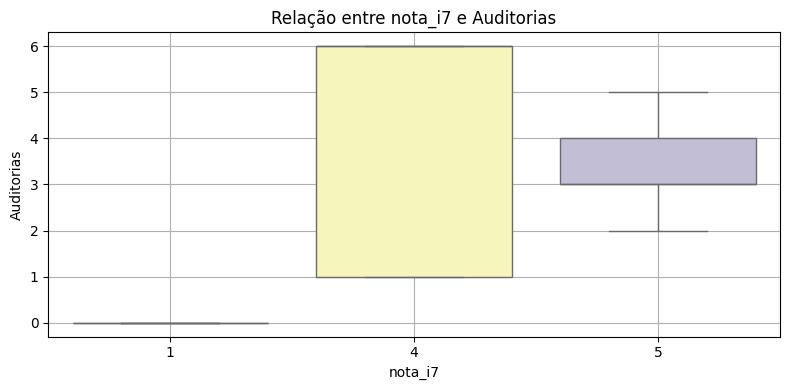

<ipython-input-32-50dc17ac4b24>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=nota, y=indicador, palette='Set3')


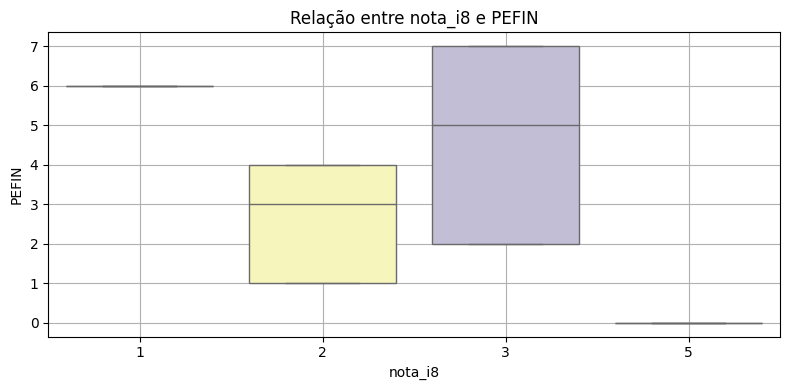

<ipython-input-32-50dc17ac4b24>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=nota, y=indicador, palette='Set3')


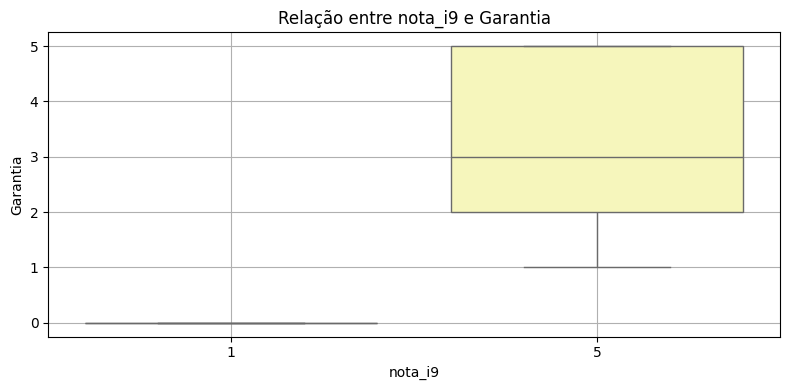

<ipython-input-32-50dc17ac4b24>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=nota, y=indicador, palette='Set3')


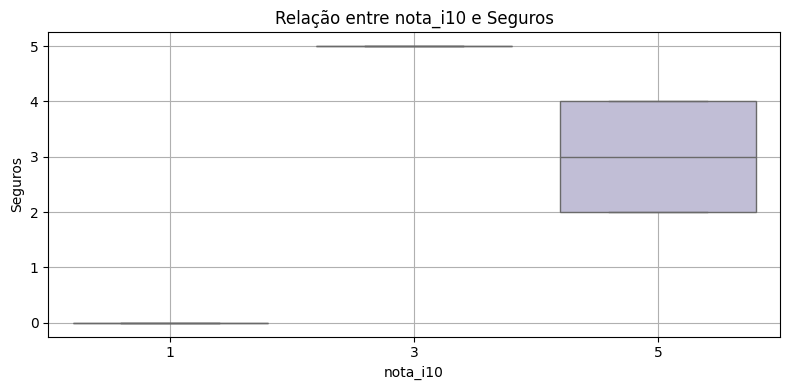

<ipython-input-32-50dc17ac4b24>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=nota, y=indicador, palette='Set3')


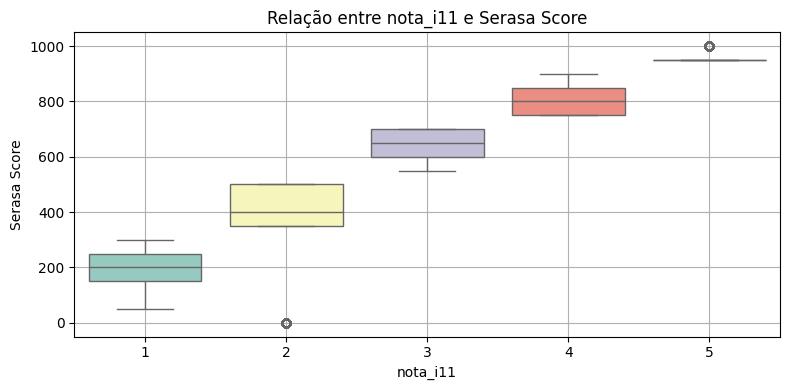

In [32]:
for nota, indicador in notas_vs_indicadores.items():
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=nota, y=indicador, palette='Set3')
    plt.title(f'Relação entre {nota} e {indicador}')
    plt.xlabel(nota)
    plt.ylabel(indicador)
    plt.grid(True)
    plt.tight_layout()
    plt.show()